Loaded dataset from CSV.
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

--- Data Description ---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000

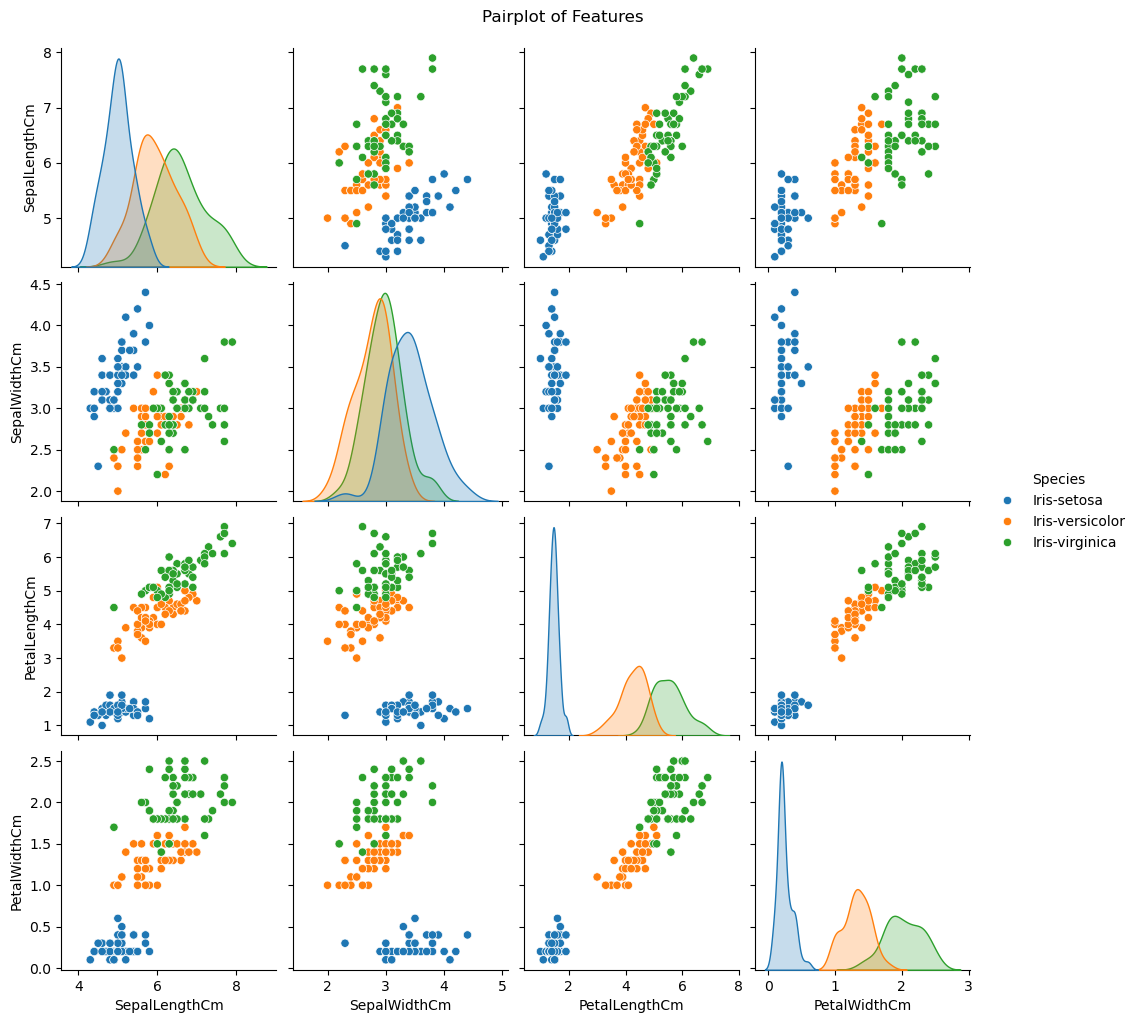

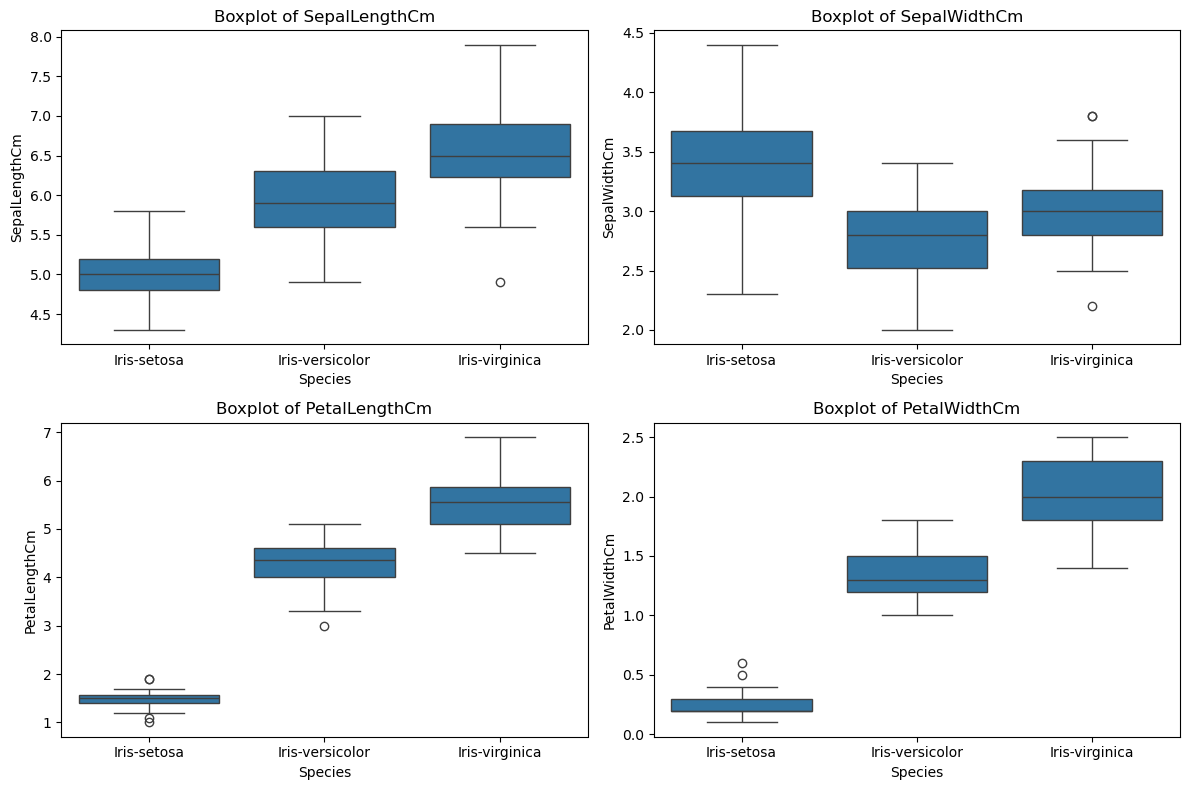

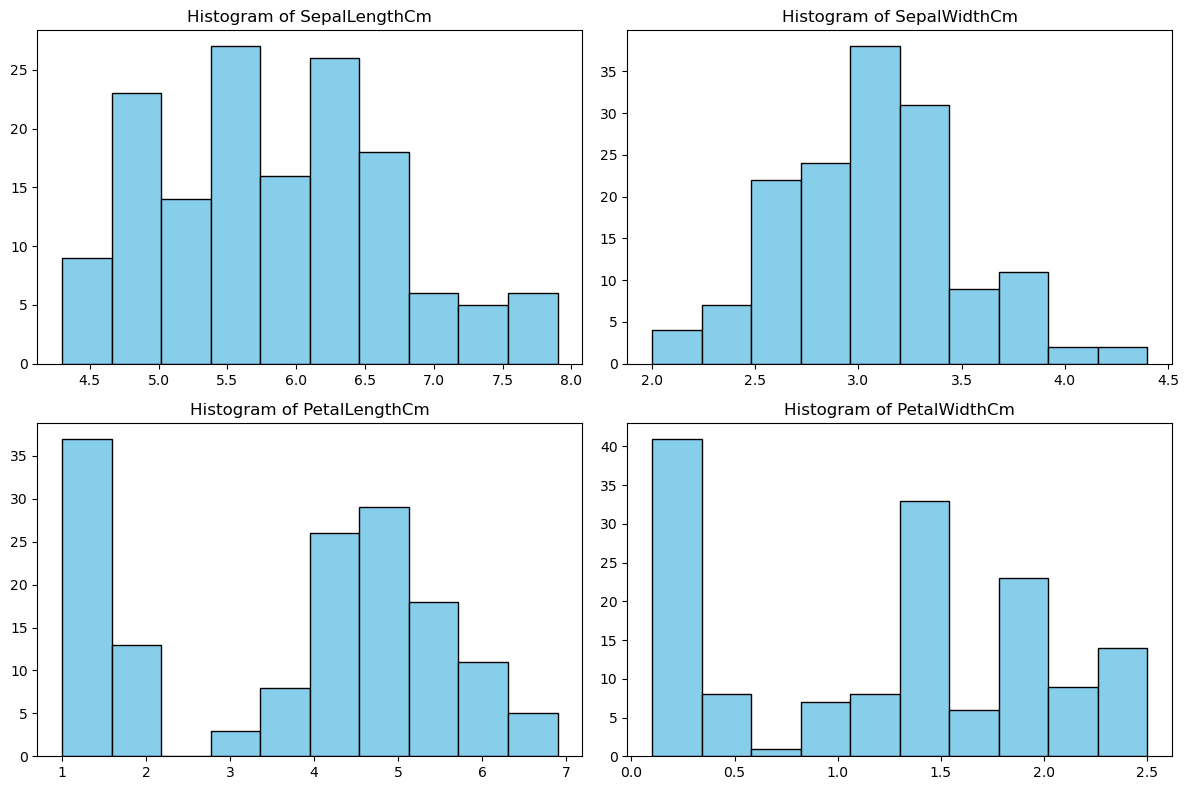

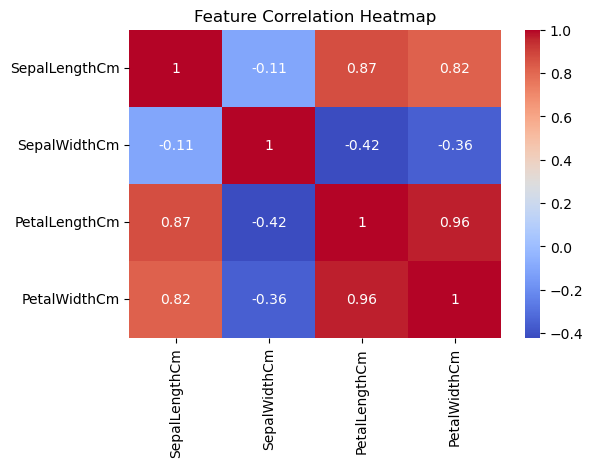


--- Missing Values ---
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Outliers removed from SepalWidthCm: (150, 5) -> (146, 5)

--- KNN ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



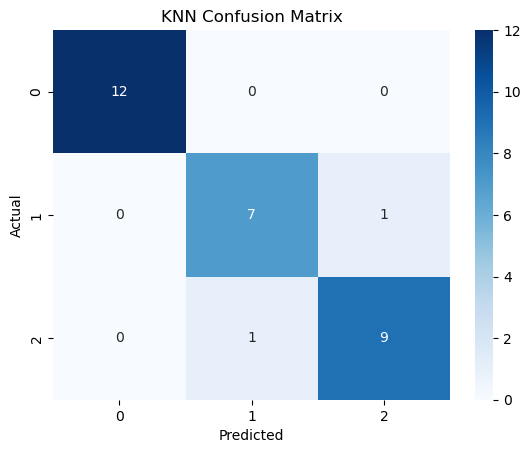


--- Decision Tree ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



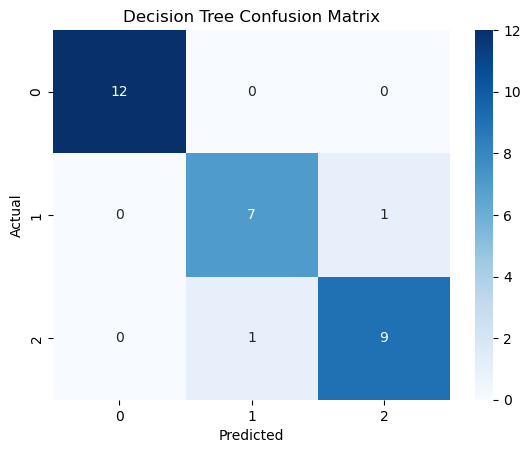


--- Random Forest ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



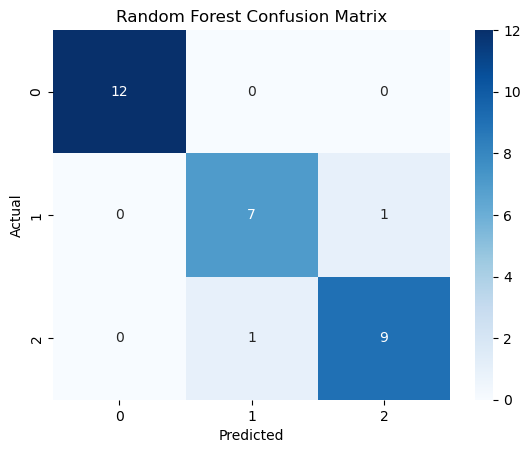


--- SVM ---
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



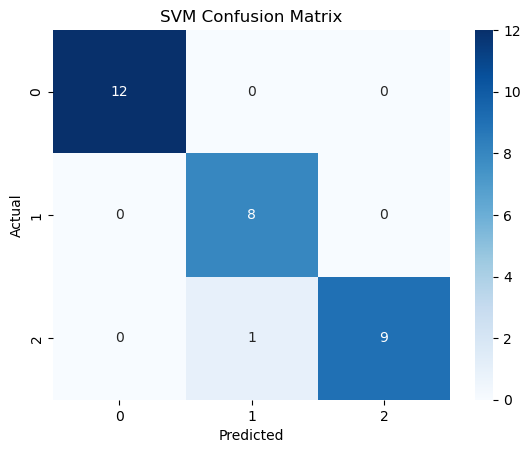


--- Logistic Regression ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



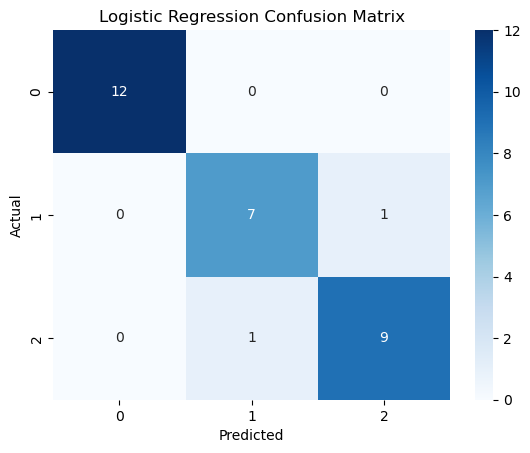


--- Cross-Validation Scores ---
KNN: Mean=0.973, Std=0.026
Decision Tree: Mean=0.959, Std=0.034
Random Forest: Mean=0.959, Std=0.026
SVM: Mean=0.966, Std=0.022
Logistic Regression: Mean=0.973, Std=0.026

Best KNN Params: {'n_neighbors': 7}, Best Score: 0.957


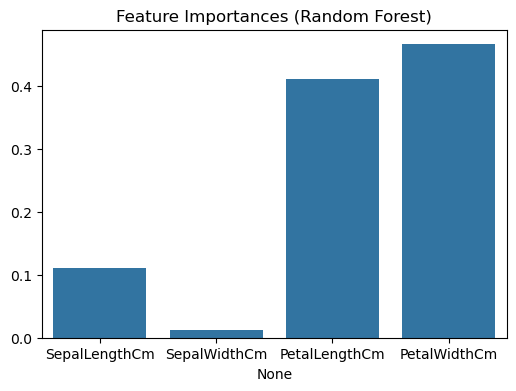


--- Final Model Comparison ---
KNN: 0.933
Decision Tree: 0.933
Random Forest: 0.933
SVM: 0.967
Logistic Regression: 0.933

Project Complete. All steps documented and visualized.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Load the Iris Dataset (from CSV if available, else sklearn)
try:
    df = pd.read_csv(r"C:\Users\Jyoti\Downloads\Iris (1).csv")
    df.columns = [col.strip().replace(' ', '').replace('Cm', 'Cm') for col in df.columns]
    if 'Id' in df.columns:
        df = df.drop('Id', axis=1)
    print('Loaded dataset from CSV.')
except Exception:
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['Species'] = iris.target
    print('Loaded dataset from sklearn.')
    print('\n--- Data Overview ---')
print(df.head())
print('\n--- Data Description ---')
print(df.describe())
print('\n--- Data Info ---')
print(df.info())
# Visualizations
sns.pairplot(df, hue='Species')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
# Check for Missing Values
print('\n--- Missing Values ---')
print(df.isnull().sum())
# Outlier Detection and Removal (IQR method for SepalWidthCm)
if 'SepalWidthCm' in df.columns:
    Q1 = np.percentile(df['SepalWidthCm'], 25)
    Q3 = np.percentile(df['SepalWidthCm'], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    before_shape = df.shape
    df = df[(df['SepalWidthCm'] <= upper) & (df['SepalWidthCm'] >= lower)]
    after_shape = df.shape
    print(f'Outliers removed from SepalWidthCm: {before_shape} -> {after_shape}')
    # Prepare Data for Training
X = df.drop('Species', axis=1)
y = df['Species']

# Encode target if needed
if y.dtype == 'O' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)
    # Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Model Training and Comparison
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'\n--- {name} ---')
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # Cross-Validation
print('\n--- Cross-Validation Scores ---')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name}: Mean={scores.mean():.3f}, Std={scores.std():.3f}')
    param_grid = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'\nBest KNN Params: {grid.best_params_}, Best Score: {grid.best_score_:.3f}')
# Feature Importance (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=importances)
plt.title('Feature Importances (Random Forest)')
plt.show()
# Final Model Evaluation and Insights
print('\n--- Final Model Comparison ---')
for name, acc in results.items():
    print(f'{name}: {acc:.3f}')
print('\nProject Complete. All steps documented and visualized.')
